In [1]:
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read in recorded simulation results
sim_df = pd.read_csv('Data/Sensitivity_analyses_data.csv', index_col=False, header=0);
#reorder results
reactions_labels = ['WC1f', 'WC1r', 'WC2f', 'WC2r', 'WC3f', 'WC4f', 'WC5f', 'WC6f', 'WCdiss', 'wobble1f', 'wobble1r', 
                    'wobble2f', 'wobble2r', 'wobble3f', 'wobble4f', 'wobble5f', 'wobble6f', 'wobblediss', 'near1f', 
                    'near1r', 'near2f', 'near2r', 'near3f', 'near4f', 'near5f', 'near6f', 'neardiss', 'non1f', 'non1r', 
                    'dec7f', 'trans1f', 'trans1r', 'trans2', 'trans3','trans4', 'trans5', 'trans6', 'trans7', 'trans8', 
                    'trans9']
codons = ['AAA', 'AAC', 'AAG', 'AAU', 'ACA', 'ACC', 'ACG', 'ACU', 'AGA', 'AGC', 'AGG', 'AGU', 'AUA', 'AUC', 'AUG', 'AUU',
          'CAA', 'CAC', 'CAG', 'CAU', 'CCA', 'CCC', 'CCG', 'CCU', 'CGA', 'CGC', 'CGG', 'CGU', 'CUA', 'CUC', 'CUG', 'CUU', 
          'GAA', 'GAC', 'GAG', 'GAU', 'GCA', 'GCC', 'GCG', 'GCU', 'GGA', 'GGC', 'GGG', 'GGU', 'GUA', 'GUC', 'GUG', 'GUU',
          'UAC', 'UAU', 'UCA', 'UCC', 'UCG', 'UCU', 'UGC', 'UGG', 'UGU', 'UUA', 'UUC', 'UUG', 'UUU']
sim_df['Reaction'] = sim_df['Reaction'].str.replace(' ', '')
sim_df= pd.concat([sim_df.query('Codon == @c').set_index('Reaction').reindex(reactions_labels).dropna() for c in codons])
sim_df = sim_df.reset_index()
yy = list(sim_df.columns)
sim_df = sim_df[[yy[1] , yy[0]] + yy[2:]]
sim_df = sim_df.assign(var_arc=sim_df['Var_explained']*np.arctan(sim_df['deriv']))
#pivot df to match plotting order
pivoted_sims=sim_df.pivot(index='Codon',columns='Reaction')['var_arc']
#ensure columns are in plotting order
pivoted_sims = pivoted_sims[['WC1f', 'WC1r', 'WC2f', 'WC2r', 'WC3f', 'WC4f', 'WC5f', 'WC6f',
       'WCdiss',  'wobble1f', 'wobble1r', 'wobble2f', 'wobble2r',
       'wobble3f', 'wobble4f', 'wobble5f', 'wobble6f', 'wobblediss', 'near1f',
       'near1r', 'near2f', 'near2r', 'near3f', 'near4f', 'near5f',
       'near6f', 'neardiss', 'trans1f', 'trans1r', 'trans2', 'trans3', 'trans4', 'trans5', 'trans6',
       'trans7', 'trans8', 'trans9']]

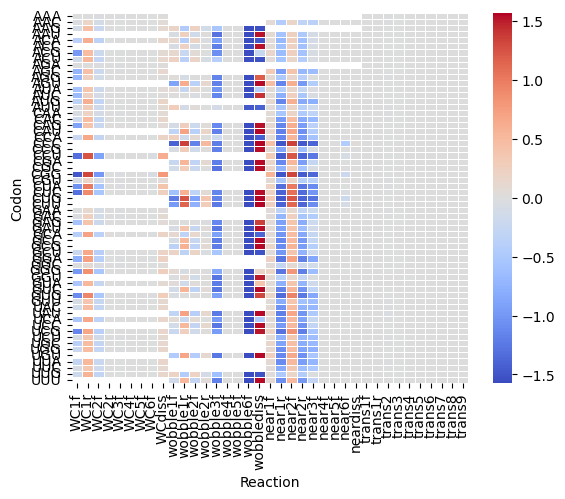

In [3]:
fig,ax = plt.subplots()
seaborn.heatmap(data=pivoted_sims, ax=ax, annot=False, linewidths=.5, cmap="coolwarm", xticklabels=1, yticklabels=1)
#plt.savefig('Figure 3 Sensitivity Analsyes.svg')
plt.show()